<a href="https://colab.research.google.com/github/Jaewon45/BDAnalysis/blob/main/4_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4-1. MNIST
- 데이터 및 라이브러리 호출

In [2]:
# import library
import sys; import tensorflow as tf; from tensorflow.keras import layers
import keras; from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np; import matplotlib.pyplot as plt

In [8]:
# hyperparameter
batch_size = 128; num_classes = 10; epochs = 12 

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


- 전처리 과정 : 각 pixel의 값을 숫자로 변형, 클래스도 원핫인코딩

In [5]:
img_rows = 28; img_cols = 28; input_shape = (img_rows, img_cols, 1)
# reshaping mnist dataset
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1).astype('float32')
# Scale images to the [0, 1] range :  data normalization (min-max normalization)
x_train /= 255.
x_test /=  255.
# convert class vectors to binary class matrices 
# 1개의 y값을 length=class개수 인 데이터로 변형
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

- CNN model 생성 및 학습

In [9]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', 
                  input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5), # node의 50% 제외
    layers.Dense(num_classes, activation = 'softmax')])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [11]:
hist = model.fit(x_train, y_train, batch_size=16, epochs=5, verbose=0, 
                 validation_data=(x_test, y_test)) 

- 모델 평가

In [12]:
# 1. loss, accuracy 확인
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026275521144270897
Test accuracy: 0.9909999966621399


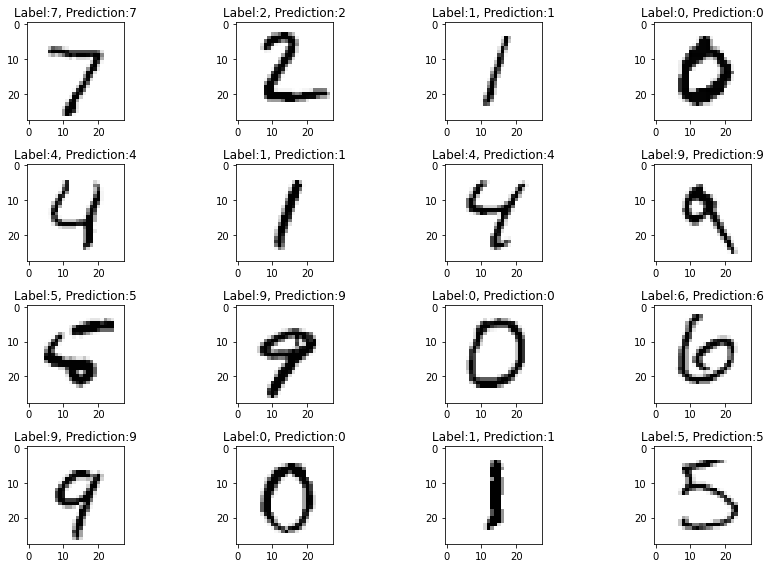

In [13]:
# 2. 학습결과 확인
import random; import matplotlib.pyplot as plt; plt.figure(figsize=(12,8))
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)  
# 확률의 최대값의 index를 추출하며 여기서는 index가 label과 동일
test_labels = np.argmax(y_test, axis=1)
count = 0
for n in range(16):
  count += 1
  plt.subplot(4, 4, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)
plt.tight_layout(); plt.show() # label은 실제 y, prediction이 예측한 class

In [16]:
# 3. 오분류표 출력
from sklearn.metrics import confusion_matrix; y_pred=model.predict(x_test) 
ypred_class=np.argmax(y_pred,axis=1); ytest_class=np.argmax(y_test,axis=1)
# print(ypred_class.size); print(ytest_class.size) 시 test셋 사이즈 출력
conf_mat=confusion_matrix(ytest_class,ypred_class) # print(conf_mat)
import pandas as pd
pd.DataFrame(conf_mat, columns=range(10), index=range(10))

,0,1,2,3,4,5,6,7,8,9
0,976,0,2,0,0,0,0,1,1,0
1,0,1133,1,0,0,0,1,0,0,0
2,1,3,1018,1,0,0,1,7,1,0
3,0,0,3,1000,0,4,0,2,1,0
4,1,0,0,0,976,0,1,0,0,4
5,2,0,0,3,0,885,1,0,1,0
6,2,2,0,0,2,3,948,0,1,0
7,0,4,3,2,0,0,0,1016,1,2
8,3,0,1,0,1,1,0,0,965,3
9,2,2,0,0,2,3,0,5,2,993


90
3


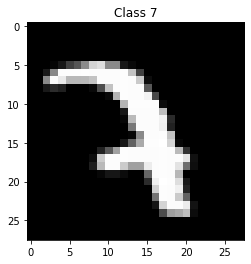

In [19]:
# 오분류 된 예시 확인
misclassified=np.where(ypred_class!=ytest_class)
aa=np.asarray(misclassified)
print(len(misclassified[0]))
plt.imshow(x_test[aa[0,3]].reshape(28,28), cmap='gray', interpolation='none')
plt.title("Class {}".format(ytest_class[aa[0,3]])); print(ypred_class[aa[0,3]])

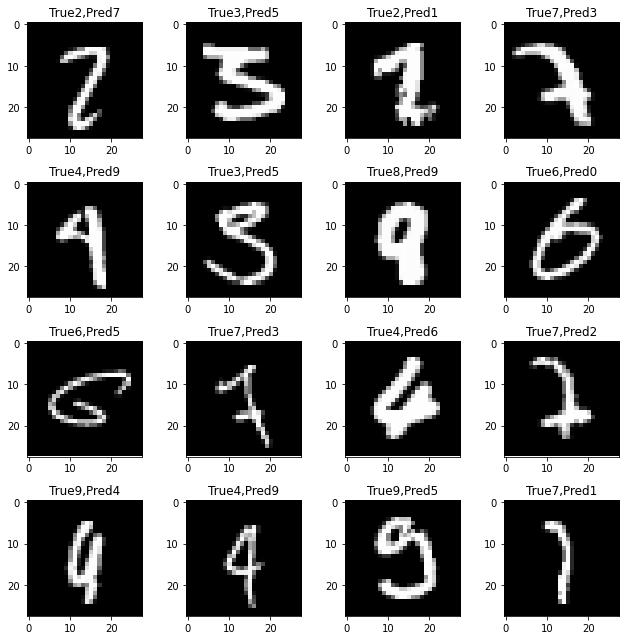

In [21]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[aa[0,i]].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("True{},Pred{}".format(ytest_class[aa[0,i]],ypred_class[aa[0,i]]))
plt.tight_layout()